In [39]:
%matplotlib ipympl

In [40]:
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [41]:
@element(num_params=3, units=["Ohm", "Ohm", "F"],overwrite=True)
def TLMilinNew(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, R2, Q = p[0], p[1], p[2]
    t12=R1/R2
    Rion1=R1
    Rion2=R2
    wclin1=1/(Rion1*Q)
    wclin2=1/(Rion2*Q)
    S1=np.sqrt(1j*omega/wclin1)
    S2=np.sqrt(1j*omega/wclin2)
    
    Z = -(2*1j*R1/S1)*(((scipy.special.yv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.jv(0,-2*1j*S1/(t12-1))))-((scipy.special.jv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.yv(0,-2*1j*S1/(t12-1)))))/(((scipy.special.jv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.yv(1,-2*1j*S1/(t12-1))))-((scipy.special.yv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.jv(1,-2*1j*S1/(t12-1)))))
    
    return Z

@element(num_params=3, units=["Ohm", "Ohm", "F"],overwrite=True)
def TLMilinNewzertSecond(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, R2, Q = p[0], p[1], p[2]
    wclin1=1/(R1*Q)
    eps=R1/R2-1
    S=np.sqrt(1j*omega/wclin1)

    Z=2*4*(np.exp(4*S)+2*np.exp(2*S)+1)*(np.exp(2*S)+1)*S/((((S**4+2*S**3+2*S**2+3/2*S+9/8)*eps**2+(-4*S**3-S)*eps-4*S**2)*np.exp(2*S)+((-S**4+2*S**3-2*S**2+3/2*S-9/8)*eps**2+(-4*S**3-S)*eps+4*S**2)*np.exp(4*S)+(-(1/8)*eps**2+S*eps+4*S**2)*np.exp(6*S)-4*S**2+S*eps+(1/8)*eps**2))
    
    return Z

In [42]:
initial_guess=[100,1,6.61e-4]
tlmilin=CustomCircuit(initial_guess=initial_guess,circuit='TLMilinNew')
tlmilin_zert=CustomCircuit(initial_guess=initial_guess,circuit='TLMilinNewzertSecond')

In [43]:
f_pred = np.logspace(4,-3,num=100)
tlmilin_pred = tlmilin.predict(f_pred)
tlmilin__zert_pred = tlmilin.predict(f_pred)

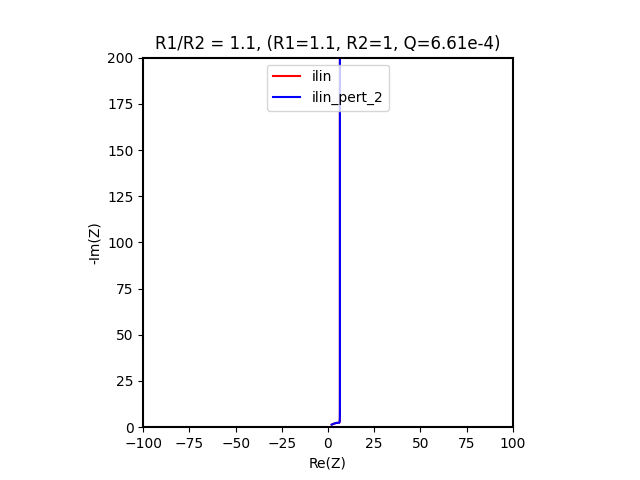

In [44]:
plt.rcParams['axes.linewidth'] = 1.5
ax= plt.figure().add_subplot()
ax.set_title("R1/R2 = 1.1, (R1=1.1, R2=1, Q=6.61e-4)")
# # factor=194.56/1.5
factor=1
ax.plot(np.real(tlmilin_pred),-np.imag(tlmilin_pred),"r",label="ilin")
ax.plot(np.real(tlmilin__zert_pred),-np.imag(tlmilin__zert_pred),"b",label="ilin_pert_2")
#ax.plot(np.real(tlmlin_semi_pred)/factor,-np.imag(tlmlin_semi_pred)/factor,"g",label="lin_semi")
#ax.plot(np.real(tlmlin_mix_pred)/factor,-np.imag(tlmlin_mix_pred)/factor,"y",label="lin_mix")
#ax.plot(np.real(tlmlin_zert_21_pred)/factor,-np.imag(tlmlin_zert_21_pred)/factor,"pink",label="lin_pert_21")
#ax.plot(np.real(tlmlin_zert_22_pred)/factor,-np.imag(tlmlin_zert_22_pred)/factor,"g",label="lin_pert_22")
#ax.legend(loc="upper center",ncol=4,bbox_to_anchor=[0.5,-0.14])
ax.legend(loc="upper center")
ax.set_xlabel("Re(Z)")
ax.set_ylabel("-Im(Z)")
ax.set_aspect("equal")
ax.set_xlim(-100,100)
ax.set_ylim(0,200)
plt.rcParams['axes.linewidth'] = 1